# Assignment 05

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: April 03, 2023

## Problem 1: Forward-backward propagation: Consider the following forward feed neural network:

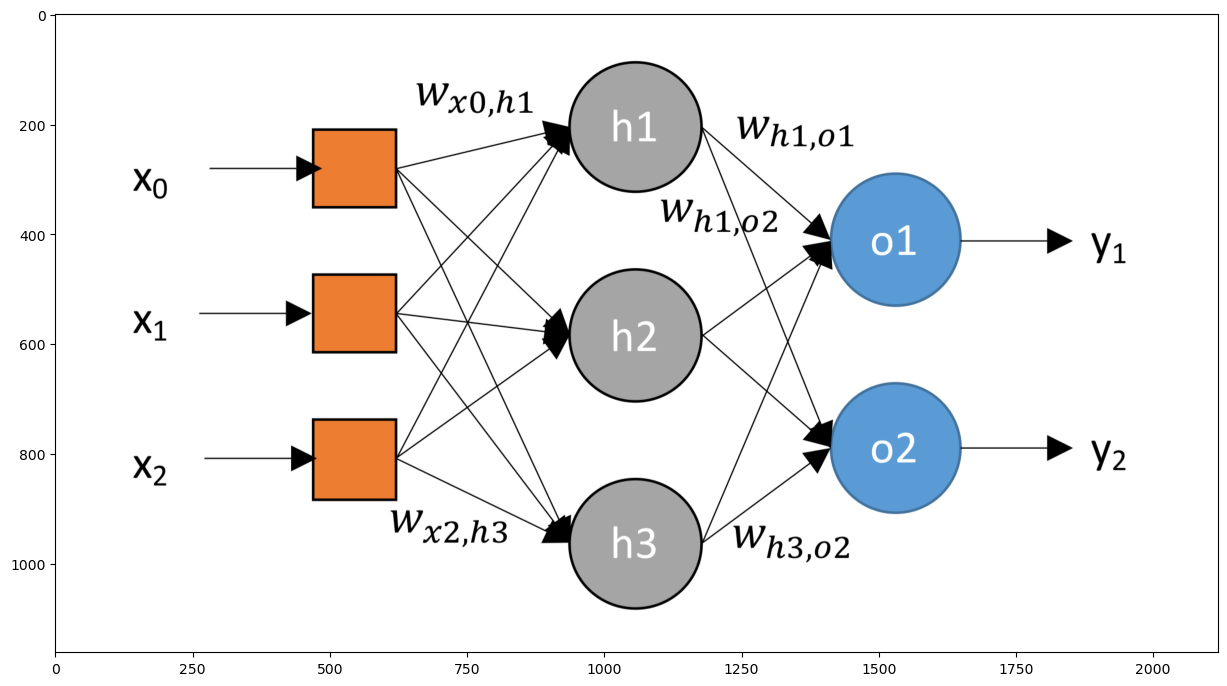

In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from PIL import Image

# reading the image
myImage = img.imread('../assets/HW5/HW5-1.png')

plt.figure(figsize = (15, 15))
plt.imshow(myImage)
plt.show()

#### Initial weights are given below:
#### Learn rate $ \eta = 0.5 $. The activation function is a sigmoid function with $ \alpha = 1 $ for all the neurons.

#### $$ \varphi(x) = \frac{1}{1 + \alpha e^{-x}} $$

#### $$ w_{x_0, h_1} = 0.18, \ w_{x_1, h_1} = 0.32, \ w_{x_2, h_1} = 0.42 $$
#### $$ w_{x_0, h_2} = 0.51, \ w_{x_1, h_2} = 0.64, \ w_{x_2, h_2} = 0.12 $$
#### $$ w_{x_0, h_3} = 0.43, \ w_{x_1, h_3} = 0.72, \ w_{x_2, h_3} = 0.33 $$
#### $$ w_{h_0, O_1} = 0.53, \ w_{h_1, O_1} = 0.22, \ w_{h_2, O_1} = 0.19, \ w_{h_2, O_1} = 0.61 $$
#### $$ w_{h_0, O_2} = 0.61, \ w_{h_1, O_2} = 0.38, \ w_{h_2, O_2} = 0.21, \ w_{h_3, O_2} = 0.15 $$

#### For training, the inputs of the features $ (x_1 = 1, \ x_2 = 0) $  and the label of class $ y_1 $ , perform the forward-backward steps as instructed below.

#### HINT: The data sample belongs to class $ y_1 $. This means that for this data sample, $ y_1 = 1 $ and $ y_2 = 0 $.

In [2]:
# function to plot images
def img_plt(img):
    plt.figure(figsize=(45, 40))
    plt.tight_layout()
    #plt.suptitle('Problem #1', fontsize=32)
    plt.tight_layout()
    for i in range(1, 7):
        plt.subplot(2, 3, i)
        plt.imshow(img[i - 1], cmap = 'gray')
        plt.title('Page: ' + str(i), fontsize=32)
    plt.show()

In [ ]:
image_filenames = ['../assets/HW5/', '../assets/HW5/', '../assets/HW5/', 
                   '../assets/HW5/', '../assets/HW5/', '../assets/HW5/']

# create a numpy array of images for printing
image_arrays = []
for filename in image_filenames:
    image = Image.open(filename)
    image_array = np.array(image)
    image_arrays.append(image_array)

img_plt(image_arrays)

## Problem 2) Application of Keras to build, compile, and train a neural network as a three-class classifier for MNIST dataset (0 vs. 1 vs. 2):

 - a) Use mnist function in keras.datasets to load MNIST dataset and split it into training and testing sets. Then, randomly select 20% of the training images along with their corresponding labels to be the validation data.
 - b) Feature extraction: average the pixel values in the quadrants in each image to generate a feature vector of 4 values for each image.
 - c) Convert the label vectors for all the sets to binary class matrices using to_categorical() Keras function.
 - d) Build, compile, train, and then evaluate:
    - i. Build a neural network with 1 layer that contains 16 nodes using the Keras library.
    - ii. Compile the network. Make sure to select a correct loss function for this classification problem. Use stochastic gradient descent learning (SGD, learning rate of 0.0001). Explain your selection of the loss function.
    - iii. Train the network for 30 epochs and a batch size of 16.
    - iv. Plot the training loss (i.e., the learning curve) for all the epochs.
    - v. Use the evaluate() Keras function to find the training and validation loss and accuracy.
 - e) Repeat step (d) for each of the following networks:
 <div align="center">

| Model # | Details | Training<br>Loss | Training<br>Accuracy | Validation<br>Loss | Validation<br>Accuracy |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $ 1 $ | 1 Layer<br>16 Nodes | X | X | X | X |
| $ 2 $ | 1 Layer<br>64 Nodes | X | X | X | X |
| $ 3 $ | 1 Layer<br>128 Nodes | X | X | X | X |
| $ 4 $ | 2 Layers<br>128 Nodes<br>16 nodes | X | X | X | X |
| $ 5 $ | 2 Layers<br>128 Nodes<br>64 nodes | X | X | X | X |

</div>

 - f) What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.
 - g) Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

In [4]:
### Code to display work for Problem 2

## Problem 3) Application of Keras to build, compile, and train a neural network to classify songs from Spotify dataset.

#### Import Training & Testing Data:

In [8]:
spotify_data = pd.read_csv('../assets/HW5/spotify_preprocessed.csv', header=0, index_col=0)

print(f'Spotify Data:\n\nShape: {spotify_data.shape}')
display(spotify_data.head())

Spotify Data:

Shape: (6398, 15)


,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,,,,,,,,,,,,,,,
0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.00000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.81809,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.00000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.00000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.00000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0


In [6]:
train_labels = np.loadtxt('../assets/HW5/spotify_preprocessed.csv', delimiter=',', skiprows=1, usecols=4)
print(train_labels.shape)
print(f'Training Labels for Training Data: {train_labels}', '\n')

(6398,)
Training Labels for Training Data: [0. 0. 0. ... 1. 1. 0.] 

